In [5]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
# filter warnings because of scikit-learns love to warnings...
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [52]:
def plot_data(X, kmeans_model=None, num_clusters=0, colors=colors):
    '''
    Helper function for visualizing the clusters and the data.
    '''
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=colors[0])
    else:
        # loop over kmeans clusters
        for cluster in range(num_clusters):
            plt.scatter(X[kmeans_model.labels_ == cluster, 0], X[kmeans_model.labels_ == cluster, 1],
                        c=colors[cluster])
    plt.show()

## Create Clustering Data Set

In [53]:
from sklearn.datasets import make_blobs

n_samples = 2000
n_features = 2
centers = 3
cluster_std = 2.5

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, 
                  cluster_std=cluster_std, random_state=42)


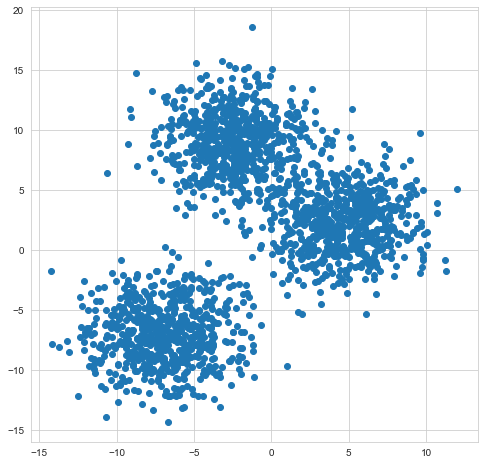

In [54]:
plot_data(X)

## Train Inital K-Means 

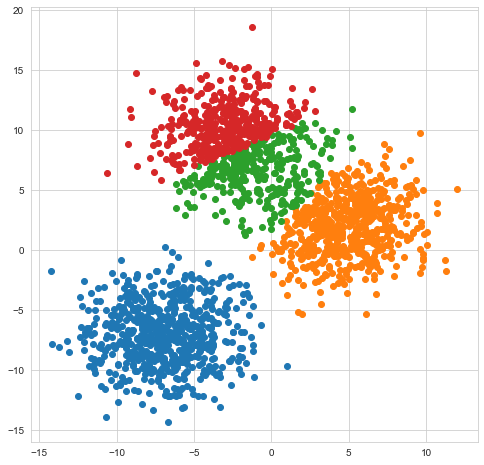

In [55]:
# train the initial k-means clustering model with 4 clusters 
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4, init="k-means++")

kmeans_model.fit(X)

plot_data(X, kmeans_model, num_clusters=4)

## Find optimal Number of Clusters

Now: The optimal number of clusters shall be found using the elbow method and the inertia value of the different k-means models.

In [56]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

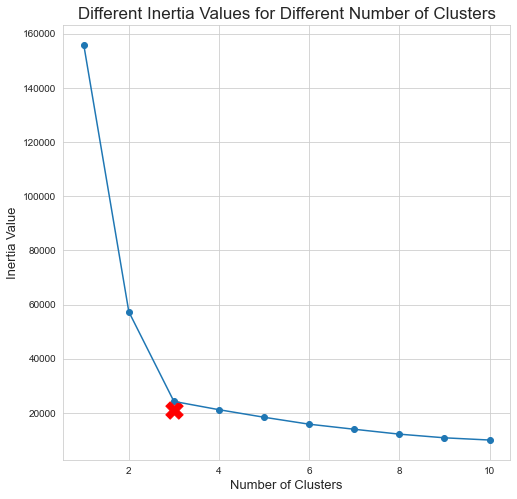

In [57]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

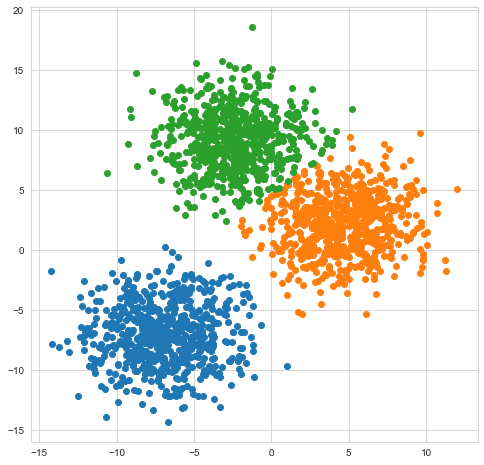

In [59]:
# train and visualize with optimal number of clusters
kmeans_model = KMeans(n_clusters=3, init="k-means++")
kmeans_model.fit(X)
plot_data(X, kmeans_model, num_clusters=3)

## Find Best Hyperparameters for K-Means

In [58]:
init_list = ["k-means++", "random"]
inertia_list = []
for init in init_list:
    kmeans_model = KMeans(n_clusters=4, init=init)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)

results = pd.DataFrame(data=inertia_list, columns=["Inertia Value"], index=init_list)
results

,Inertia Value
k-means++,21166.174343
random,21165.868536
